# Meteorite project

In [1]:
import pandas as pd
meteorite=pd.read_csv('Meteorie.csv')

In [2]:
meteorite['fall'] = meteorite['fall'].replace({'Found':1,'Fell':0})

# Exclude all class except the top 5

In [3]:
final_data=meteorite.drop(columns=['GeoLocation','id','nametype','name'])
import pandas as pd

classes_to_be_kept = ['L6', 'H5', 'L5','H6','H4']

final_data = final_data[final_data['recclass'].isin(classes_to_be_kept)]
final_data = final_data.reset_index()
final_data=final_data.drop(columns=['index'])

In [4]:
value_counts = final_data['recclass'].value_counts()

# Dealing with nan values using SimpleImputer with mean strategy

In [5]:
from sklearn.impute import SimpleImputer
import numpy as np
 
imputer_num = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
 
num_cols = ['mass (g)', 'year', 'reclat', 'reclong']
cat_col = ['recclass']
 
final_data[num_cols] = imputer_num.fit_transform(final_data[num_cols]) 
final_data[cat_col] = imputer_cat.fit_transform(final_data[cat_col])


In [6]:
print('Mass null value: ',final_data['mass (g)'].isnull().sum())
print('Year null value: ',final_data['year'].isnull().sum())
print('Latitude null value: ',final_data['reclat'].isnull().sum())
print('Longitude null value: ',final_data['reclong'].isnull().sum())
print('reclass null value: ',final_data['recclass'].isnull().sum())

Mass null value:  0
Year null value:  0
Latitude null value:  0
Longitude null value:  0
reclass null value:  0


# Dividing Data into X and Y

In [7]:
X = final_data.drop(columns=['fall']) 
Y = final_data['fall']

# Encoding reclass using OneHotEncoder

In [8]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_data = encoder.fit_transform(X[['recclass']])

# Get the feature names for the encoded columns
feature_names = encoder.get_feature_names_out(['recclass'])
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)

train = pd.concat([X.reset_index(drop=True), encoded_df], axis=1)

X = train
X = X.drop(columns=['recclass'])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

# Scaling using StandardScaler

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_std= scaler.fit_transform(X_train) 
y_std = Y_train.to_numpy()

# Multilayer Perceptron (MLP) for fitting data
A multi-layer perceptron (MLP) is a type of artificial neural network consisting of multiple layers of neurons. The neurons in the MLP typically use nonlinear activation functions, allowing the network to learn complex patterns in data.

In [11]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', max_iter=500, random_state=42)

clf.fit(x_std, y_std)

MLPClassifier(max_iter=500, random_state=42)

# Prediction, Accuracy and kappa cohens

In [12]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

predictions_mlp = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(Y_test, predictions_mlp)
report = classification_report(Y_test, predictions_mlp)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

kappa_mlp = cohen_kappa_score(Y_test, predictions_mlp)

print("Cohen's Kappa:", kappa_mlp)

Accuracy: 0.9765233902986363
Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.03      0.06       125
           1       0.98      1.00      0.99      5668

    accuracy                           0.98      5793
   macro avg       0.59      0.51      0.52      5793
weighted avg       0.96      0.98      0.97      5793

Cohen's Kappa: 0.050146966273711735


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [13]:
from sklearn.metrics import accuracy_score, classification_report

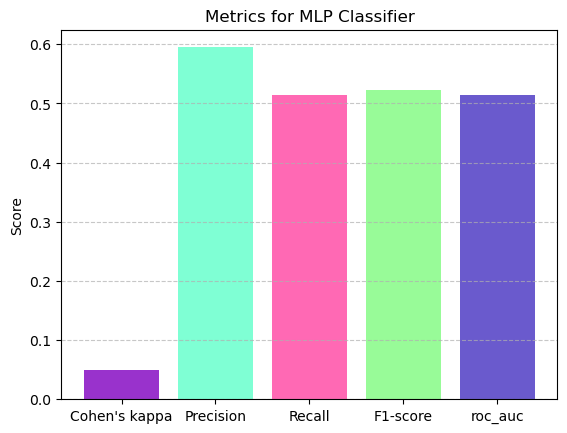

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

accuracy = accuracy_score(Y_test, predictions_mlp)
precision = precision_score(Y_test, predictions_mlp, average='macro')
recall = recall_score(Y_test, predictions_mlp, average='macro')
f1 = f1_score(Y_test, predictions_mlp, average='macro')
conf_matrix = confusion_matrix(Y_test, predictions_mlp)
roc_auc = roc_auc_score(Y_test, predictions_mlp)
fpr, tpr, thresholds = roc_curve(Y_test, predictions_mlp)
precision_curve, recall_curve, _ = precision_recall_curve(Y_test, predictions_mlp)

kappa_mlp = cohen_kappa_score(Y_test, predictions_mlp)

labels = ['Cohen\'s kappa', 'Precision', 'Recall', 'F1-score','roc_auc']
values = [kappa_mlp, precision, recall, f1,roc_auc]
colors = ['darkorchid', 'aquamarine', 'hotpink', 'palegreen', 'slateblue']
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.bar(labels, values,color=colors)
plt.title('Metrics for MLP Classifier')
plt.ylabel('Score')
plt.show()
